## Part 1: Take Home Exercise

In [1]:
# import nesesary packages
import pandas as pd
import numpy as np
import math

# plot
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.dbStats import TransactionalDatabase as tds
import helpers.data_mining_helpers as dmh # TA's functions


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. I get the first five data that category name of X is `soc.religion.christian`. 

In [4]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [5]:
#Answer here
X.loc[X.category_name=='soc.religion.christian'][:5]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian


### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [6]:
# Answer here
X.loc[X.category_name=='sci.med'][::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [7]:
# Answer here
X.isnull().apply(lambda x:dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [10]:
# sample 
X_sample = X.sample(n = 1000) #random state

# Answer here
print(f'dimension of X:{X.shape},', f'dimension of X_shape:{X_sample.shape}') # different dimension

dimension of X:(2257, 3), dimension of X_shape:(1000, 3)


### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

category_name
soc.religion.christian    279
sci.med                   257
comp.graphics             249
alt.atheism               215
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

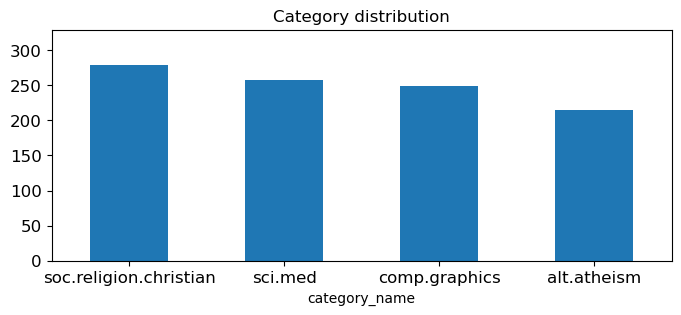

In [11]:
# Answer here
upper_bound = max(X_sample.category_name.value_counts()+50)
print(X_sample.category_name.value_counts())
plt.style.use('default')
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: title={'center': 'Category Distribution'}, xlabel='category_name'>

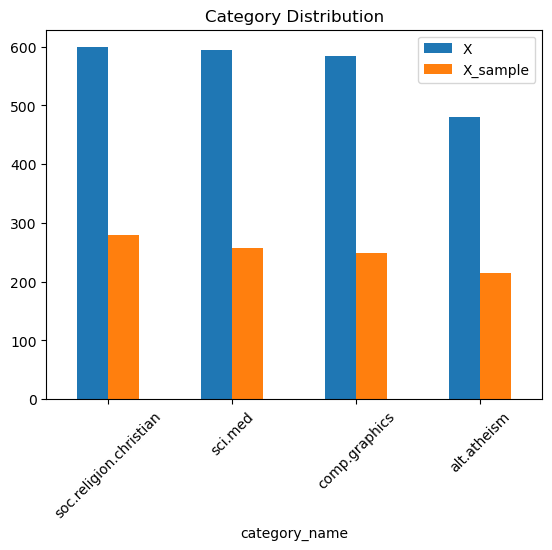

In [12]:
# Answer here:
df_X = pd.DataFrame(X.category_name.value_counts())
df_X.columns = ['X']
df_X_sample = pd.DataFrame(X_sample.category_name.value_counts())
df_X_sample.columns = ['X_sample']
df = pd.concat([df_X, df_X_sample], axis=1)
df.plot.bar(title = 'Category Distribution', rot = 45)

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [13]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()

In [14]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
# Answer here
print(f'Another {X_counts[4, 37]} in the same record represents : {count_vect.get_feature_names_out()[37:38]} in the vocabulary')

Another 1 in the same record represents : ['01'] in the vocabulary


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

/var/folders/cb/ppgbx9sd2sv5v71wgbd52c140000gn/T/ipykernel_28775/269212443.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 2257 + 1) instead
  y=list(np.random.random_integers(0,len(X.index),size=20))


<Axes: >

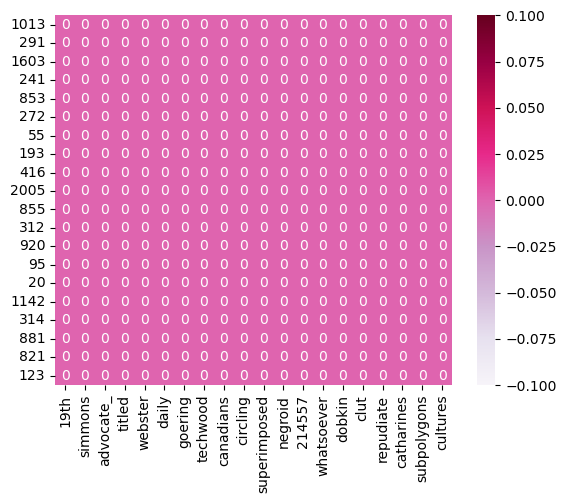

In [16]:
# Answer here
x=list(np.random.choice(count_vect.get_feature_names_out(),20,replace=False))
xt=[]
for i in x:
    xt.append(list(count_vect.get_feature_names_out()).index(i))
y=[]
y=list(np.random.random_integers(0,len(X.index),size=20))
z =X_counts[y, :][:, xt].toarray()
z=pd.DataFrame(z,columns=x,index=y)
sns.heatmap(z,cmap="PuRd",vmin=0, annot=True)

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies_temp[0,:300])])
fig.show()

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [23]:
# Answer here
fig = go.Figure([go.Bar(x=count_vect.get_feature_names_out()[:50], y=term_frequencies_temp[0,:50])])
fig.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order.


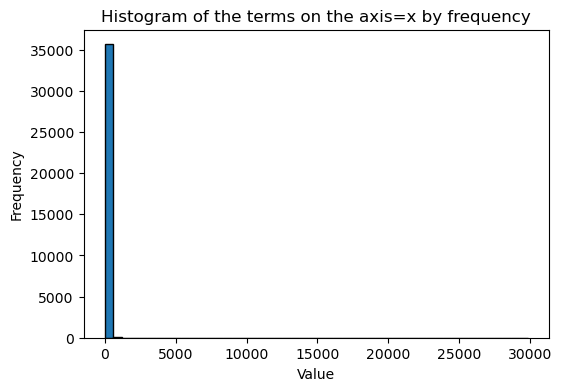

In [41]:
# calculate frequency
term_frequencies = X_counts.toarray().sum(axis = 0)
# Answer here
plt.figure(figsize=(6, 4))
plt.hist(term_frequencies, bins=50, edgecolor='black')
plt.title('Histogram of the terms on the axis=x by frequency')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

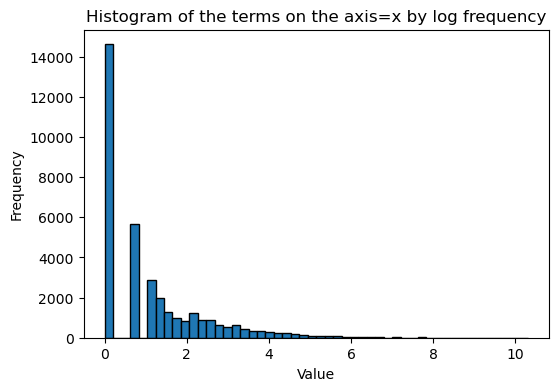

In [24]:
# Answer here
term_frequencies_log = np.log(term_frequencies)

plt.figure(figsize=(6, 4))
plt.hist(term_frequencies_log, bins=50, edgecolor='black')
plt.title('Histogram of the terms on the axis=x by log frequency')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

這四個種類的再篩選掉前 5% 的字和後 1% 的字的時候，還是有某些詞同時都有出現在這四個類別當中的，分別對不同類別的字計數，可發現不同主題高頻的字不太相同，以下分別是四個不同類別出現的高頻字：
- comp.graphics: test, maybe, thus, converter, studio
- soc.religion.christian: husband, rules, reject, whom, form
- sci.med: heaven, paulson, muscle, review, dan
- alt.atheism:comes, lack, james, posts 

In [46]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs

In [47]:
# Answer here
category_number = 0 
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
a = filtered_term_document_dfs[categories[category_number]]
a.sum(axis=0).sort_values()

Filtered Term-Document Frequency DataFrame for Category comp.graphics:


ªl            1
dickson       1
wkshop        1
dick          1
dicer         1
             ..
test         27
maybe        27
thus         27
converter    27
studio       27
Length: 12932, dtype: int64

In [48]:
category_number = 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
b = filtered_term_document_dfs[categories[category_number]]
b.sum(axis=0).sort_values()

Filtered Term-Document Frequency DataFrame for Category soc.religion.christian:


interval     1
fierce       1
roof         1
rooms        1
rooted       1
            ..
husband     36
rules       36
reject      36
whom        36
form        36
Length: 13041, dtype: int64

In [49]:
category_number = 2
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
c = filtered_term_document_dfs[categories[category_number]]
c.sum(axis=0).sort_values()

Filtered Term-Document Frequency DataFrame for Category sci.med:


0000          1
lanier        1
lanham        1
languages     1
langs         1
             ..
haven        29
paulson      29
muscle       29
review       29
dan          29
Length: 15283, dtype: int64

In [50]:
category_number = 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
d = filtered_term_document_dfs[categories[category_number]]
d.sum(axis=0).sort_values()

Filtered Term-Document Frequency DataFrame for Category alt.atheism:


infinities     1
jub            1
jsi            1
jpl            1
joyful         1
              ..
21            36
comes         36
lack          36
james         36
posts         36
Length: 11250, dtype: int64

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162144
Sparsity : 0.9932801851851852


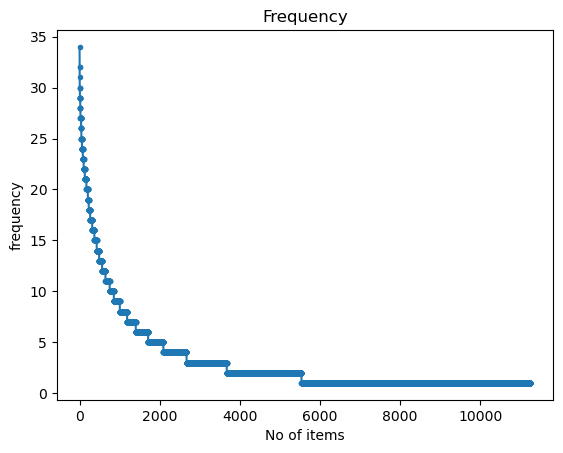

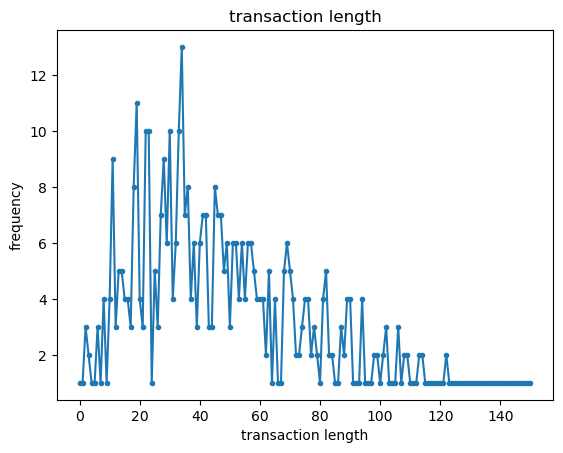

In [36]:
from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.dbStats import TransactionalDatabase as tds

# Replace dots with underscores in the category name to avoid errors in the file creation
category_safe = 'comp.graphics'.replace('.', '_')
# Create the DenseFormatDF object and convert to a transactional database
obj = db.DenseFormatDF(term_document_dfs[category])
obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
# look into the states of the newly created transactional databese 
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [43]:
from PAMI.frequentPattern.topk import FAE  as alg

# set input file
inputFile = '/Users/ericahsu/AI_course/DM-HW1/td_freq_db_comp_graphics.csv'

# run FAE Top-K with k=500
obj = alg.FAE(iFile=inputFile, k = 500, sep = '\t') #initialize
obj.mine() # start the mining process
frequentPatternsDF_comp_graphics= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime
print('------------------------------------------') 
obj.save(outFile='/Users/ericahsu/AI_course/DM-HW1/top500FAE.txt')

# run FAE Top-K with k=1000
obj = alg.FAE(iFile=inputFile, k = 500, sep = '\t') #initialize
obj.mine() # start the mining process
frequentPatternsDF_comp_graphics= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime
print('------------------------------------------') 
obj.save(outFile='/Users/ericahsu/AI_course/DM-HW1/top100FAE.txt')

# run FAE Top-K with k=1500
obj = alg.FAE(iFile=inputFile, k = 1500, sep = '\t') #initialize
obj.mine() # start the mining process
frequentPatternsDF_comp_graphics= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime
obj.save(outFile='/Users/ericahsu/AI_course/DM-HW1/top1500FAE.txt')

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.21855998039245605
------------------------------------------
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.11644482612609863
------------------------------------------
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1500
Runtime: 0.9260082244873047


In [50]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm

# set input file
inputFile = '/Users/ericahsu/AI_course/DM-HW1/td_freq_db_comp_graphics.csv'

# run MaxFPGrowth with threshold=3
obj = alg.MaxFPGrowth(iFile=inputFile, minSup=3, sep='\t') #initialize
obj.mine() # start the mining process
frequentPatternsDF_comp_graphics= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime
print('------------------------------------------') 
obj.save(outFile='/Users/ericahsu/AI_course/DM-HW1/MaxFPGrowth3.txt')

# run MaxFPGrowth with threshold=6
obj = alg.MaxFPGrowth(iFile=inputFile, minSup=6, sep='\t') #initialize
obj.mine() # start the mining process
frequentPatternsDF_comp_graphics= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime
print('------------------------------------------') 
obj.save(outFile='/Users/ericahsu/AI_course/DM-HW1/MaxFPGrowth6.txt')

# run MaxFPGrowth with threshold=9
obj = alg.MaxFPGrowth(iFile=inputFile, minSup=9, sep='\t') #initialize
obj.mine() # start the mining process
frequentPatternsDF_comp_graphics= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime
obj.save(outFile='/Users/ericahsu/AI_course/DM-HW1/MaxFPGrowth9.txt')

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 17153
Runtime: 6.362994909286499
------------------------------------------
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 2390
Runtime: 0.2396378517150879
------------------------------------------
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 881
Runtime: 0.11752891540527344


### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [59]:
# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [64]:
import pandas as pd
from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.frequentPattern.basic import FPGrowth as alg
from sklearn.feature_extraction.text import CountVectorizer

# set folder
folder = '/Users/ericahsu/AI_course/DM-HW1/'

"""create dictionary"""
# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

"""run FPGrowth alogorithm"""
# comp.graphics
obj1 = alg.FPGrowth(iFile = folder + 'td_freq_db_comp_graphics.csv', minSup = 9)
obj1.mine()
frequentPatternsDF_comp_graphics = obj1.getPatternsAsDataFrame()
obj1.save(folder + 'freq_patterns_comp_graphics_minSup9.txt') # save the patterns
# sci.med
obj2 = alg.FPGrowth(iFile = folder + 'td_freq_db_sci_med.csv', minSup = 9)
obj2.mine()
frequentPatternsDF_sci_med = obj1.getPatternsAsDataFrame()
obj2.save(folder + 'freq_patterns_sci_med_minSup9.txt') # save the patterns
# religion.christian
obj3 = alg.FPGrowth(iFile = folder + 'td_freq_db_soc_religion_christian.csv', minSup = 9)
obj3.mine()
frequentPatternsDF_religion_christian= obj2.getPatternsAsDataFrame()
obj3.save(folder + 'freq_patterns_religion_christian_minSup9.txt') # save the patterns
# alt.atheism
obj4 = alg.FPGrowth(iFile = folder + 'td_freq_db_alt_atheism.csv', minSup = 9)
obj4.mine()
frequentPatternsDF_alt_atheism= obj3.getPatternsAsDataFrame()
obj4.save(folder + 'freq_patterns_alt_atheism_minSup9.txt') #save the patterns

"""integrate them effectively with our initial data for further analysis."""
# We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]
# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)
# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

"""integrate these now category-specific patterns into our data"""
# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary
# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)
# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])
# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)
# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


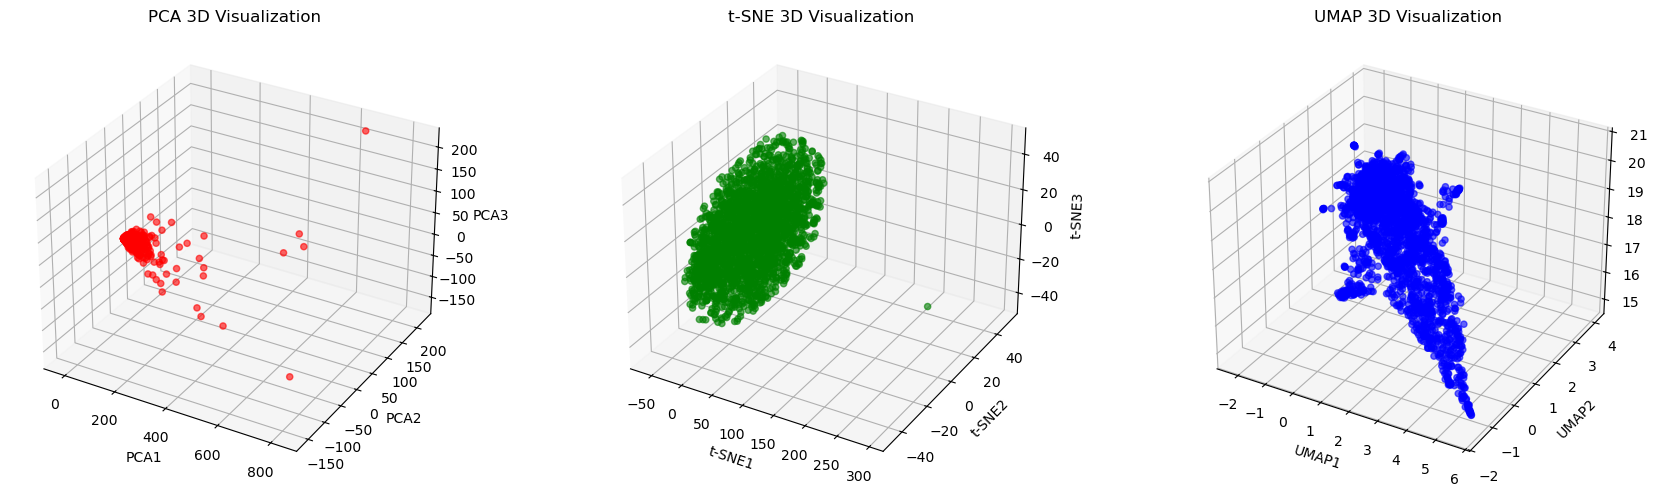

In [69]:
# Answer here
# Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# 创建一个图形和三个3D子图
fig = plt.figure(figsize=(18, 5))

# 使用 PCA 降维的数据
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_pca_tdm[:, 0], X_pca_tdm[:, 1], X_pca_tdm[:, 2], c='r', alpha=0.6)
ax1.set_title('PCA 3D Visualization')
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_zlabel('PCA3')

# 使用 t-SNE 降维的数据
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_tsne_tdm[:, 0], X_tsne_tdm[:, 1], X_tsne_tdm[:, 2], c='g', alpha=0.6)
ax2.set_title('t-SNE 3D Visualization')
ax2.set_xlabel('t-SNE1')
ax2.set_ylabel('t-SNE2')
ax2.set_zlabel('t-SNE3')

# 使用 UMAP 降维的数据
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_umap_tdm[:, 0], X_umap_tdm[:, 1], X_umap_tdm[:, 2], c='b', alpha=0.6)
ax3.set_title('UMAP 3D Visualization')
ax3.set_xlabel('UMAP1')
ax3.set_ylabel('UMAP2')
ax3.set_zlabel('UMAP3')

# 调整布局并显示图形
plt.tight_layout()
plt.show()

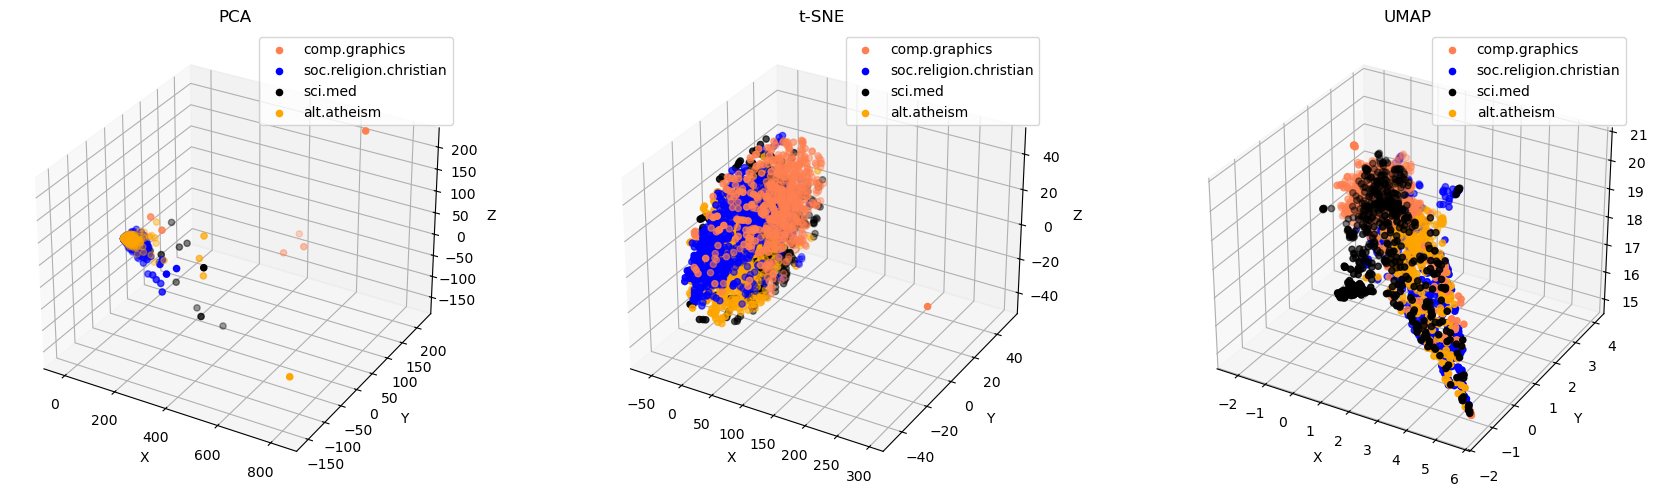

In [73]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

# 定义一个函数，用于每个方法创建三维散点图
def plot_3d_scatter(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax1.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

# 创建一个图，并添加三维子图
fig = plt.figure(figsize=(18, 5))
axes = [fig.add_subplot(131, projection='3d'),
        fig.add_subplot(132, projection='3d'),
        fig.add_subplot(133, projection='3d')]

# 使用 PCA, t-SNE, 和 UMAP 绘制三维散点图
plot_3d_scatter(axes[0], X_pca_tdm, 'PCA', 20, 30)
plot_3d_scatter(axes[1], X_tsne_tdm, 't-SNE', 20, 30)
plot_3d_scatter(axes[2], X_umap_tdm, 'UMAP', 20, 30)

plt.tight_layout()
plt.show()

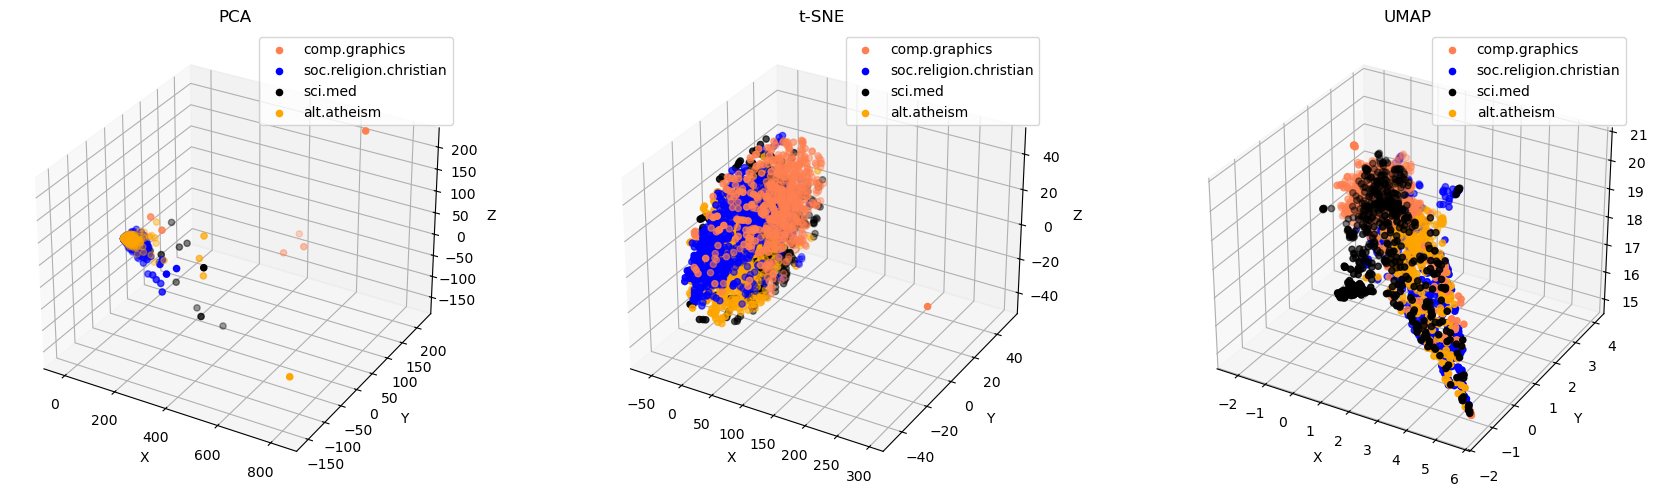

In [74]:
# 创建一个图，并添加三维子图
fig = plt.figure(figsize=(18, 5))
axes = [fig.add_subplot(131, projection='3d'),
        fig.add_subplot(132, projection='3d'),
        fig.add_subplot(133, projection='3d')]

# 使用 PCA, t-SNE, 和 UMAP 绘制三维散点图
plot_3d_scatter(axes[0], X_pca_tdm, 'PCA', 30, 120)
plot_3d_scatter(axes[1], X_tsne_tdm, 't-SNE', 30, 120)
plot_3d_scatter(axes[2], X_umap_tdm, 'UMAP', 30, 120)

plt.tight_layout()
plt.show()

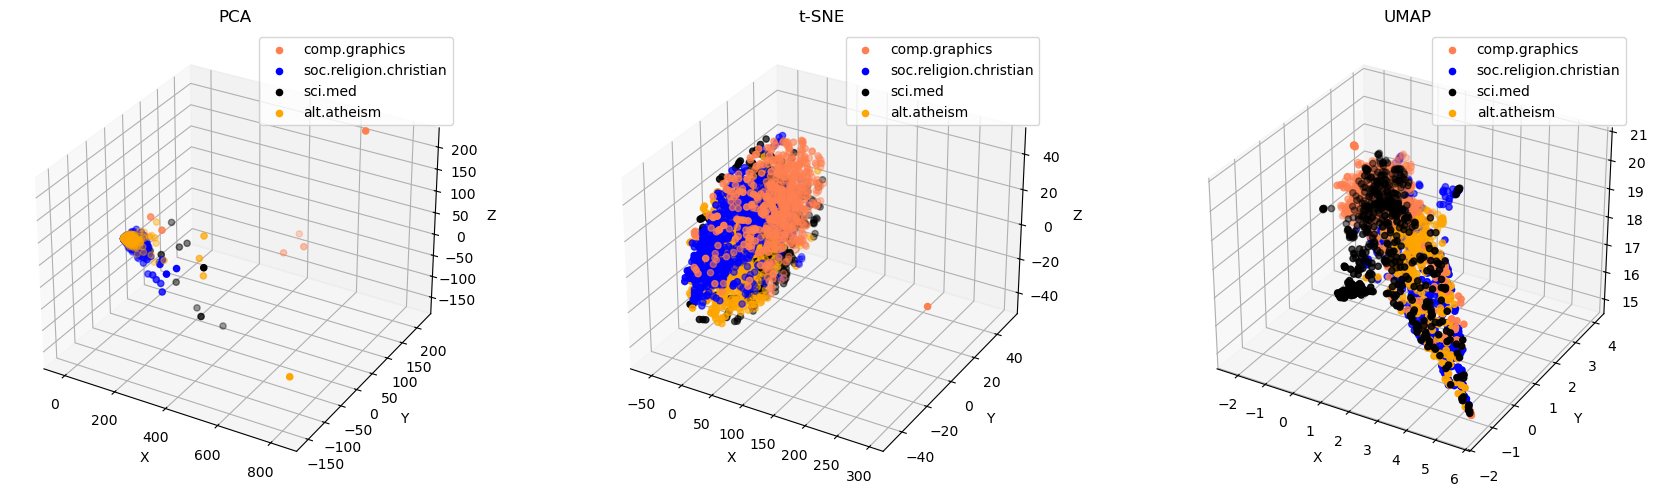

In [75]:
# 创建一个图，并添加三维子图
fig = plt.figure(figsize=(18, 5))
axes = [fig.add_subplot(131, projection='3d'),
        fig.add_subplot(132, projection='3d'),
        fig.add_subplot(133, projection='3d')]

# 使用 PCA, t-SNE, 和 UMAP 绘制三维散点图
plot_3d_scatter(axes[0], X_pca_tdm, 'PCA', 40, 210)
plot_3d_scatter(axes[1], X_tsne_tdm, 't-SNE', 40, 210)
plot_3d_scatter(axes[2], X_umap_tdm, 'UMAP', 40, 210)

plt.tight_layout()
plt.show()

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [77]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,tokenized_text,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"{The, any, (HP, From:, Michael, in, format., 0...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"{trivially, segments., Math, The, any, cells.,...","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"{=CSE, any, employee, it, From:, ignored, hurt...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"{german, Faculteit, fill, From:, tell, (M.M., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"{sins,, The, tells, king, certain, it, From:, ...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"{irrelevant, otherwise, The, tranfusion, stand...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"{The, strong, Galatians, it, From:, giving, ba...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"{any, pimple, it, From:, :), clearasil., lucky...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"{indeed, other, two, what, it, From:, common, ...","[0, 0, 1, 0]"
